In [42]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

In [43]:
model.layers

In [44]:
conv = model.layers[0]
print('가중치 : ', conv.weights[0].shape, '절편 :',conv.weights[1].shape)

가중치 :  (3, 3, 1, 32) 절편 : (32,)


In [45]:
conv.weights

[<tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.11354838,  0.17067724,  0.15621532,  0.08622666,
           -0.26547945, -0.10153592, -1.2032112 , -0.05552715,
            0.02914389,  0.23892692, -0.03726042, -0.33376333,
            0.20895612, -0.01468507, -0.31415486,  0.08424354,
            0.12878345,  0.292153  , -0.2701609 , -0.08740923,
           -0.02454412,  0.21697567,  0.3212674 ,  0.28275186,
            0.13380624,  0.06260303, -1.0682068 , -0.686872  ,
           -0.3101281 ,  0.03950767, -0.06414823,  0.04864276]],
 
         [[ 0.22484648,  0.16752131, -0.08455648, -0.03803469,
            0.32196677, -0.08467313, -0.8247823 ,  0.0667238 ,
           -0.22054324, -0.02710774,  0.1023373 , -0.32314053,
            0.10004394,  0.05471085,  0.25329533,  0.14564347,
            0.21344618,  0.16718994,  0.3591623 ,  0.10715406,
           -0.4809029 , -0.12248678,  0.25642788, -0.19472279,
           -0.18048856,  0.26966915, -

In [46]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.027484814 0.25798547


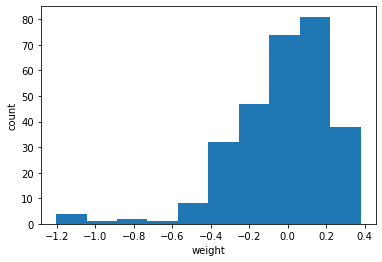

In [47]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

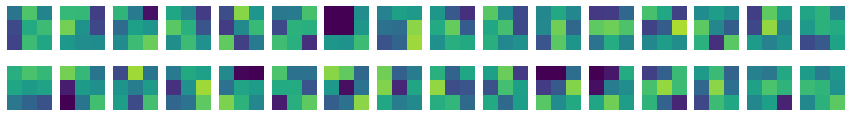

In [48]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [49]:
conv_weights[:,:,0,0]

array([[-0.11354838,  0.22484648, -0.04971032],
       [-0.27907264,  0.11064156,  0.18405567],
       [-0.29923463,  0.18605322,  0.09084748]], dtype=float32)

### conv

In [68]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=
                                          'relu', padding='same', input_shape=(28, 28, 1)))

In [69]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [70]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0020695797 0.08623047


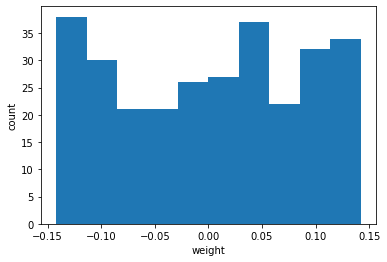

In [71]:
import matplotlib.pyplot as plt

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

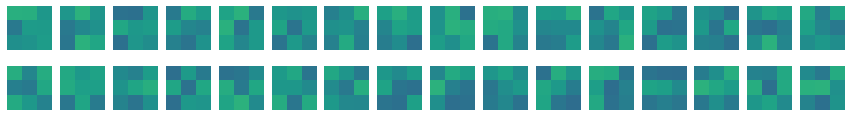

In [72]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

# 특성 맵 시각화

### 케라스의 함수형 API

In [83]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_4_input')>

In [85]:
conv_acti = keras.Model(model.input, model.layers[0].output)

### 이미지 확인

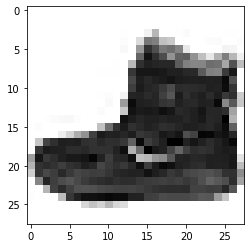

In [89]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

### 이미지 통과 및 확인

In [92]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 23ms/step


In [95]:
print(feature_maps.shape)
print('\n샘플 1개, (28, 28) 사이즈, 32개의 필터')

(1, 28, 28, 32)

샘플 1개, (28, 28) 사이즈, 32개의 필터


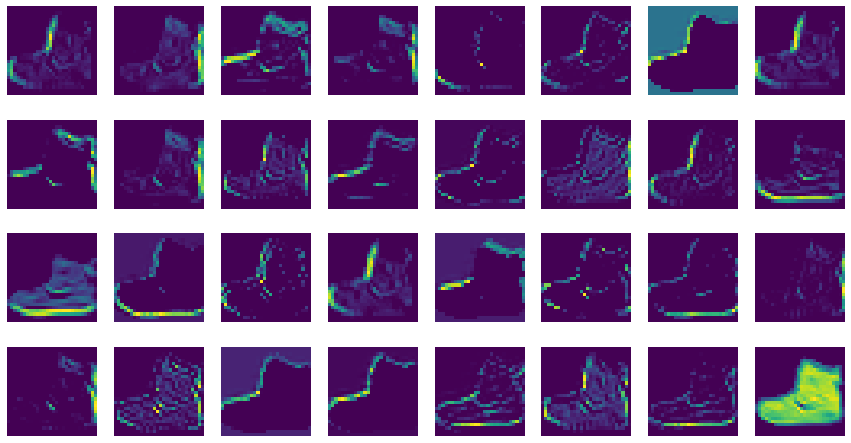

In [96]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis('off')
plt.show()

In [97]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [98]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 54ms/step


In [101]:
model.layers[:3]

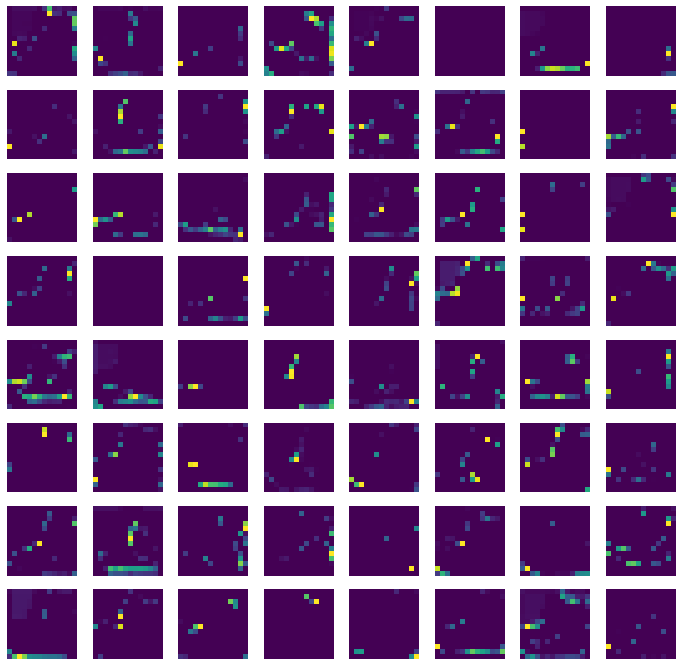

In [102]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis('off')
plt.show()

In [106]:
model._layers[0].input

AttributeError: 'Sequential' object has no attribute '_layers'